# Machine Learning

In [70]:
import pandas as pd
import seaborn

pd.set_option('display.max_columns', None)

In [71]:
df = pd.read_csv('../data/processed/credit-score.csv', index_col='ID')

## Feature Selection

I'll be dropping all the features that I won't be using.

In [72]:
df.drop(columns=['Occupation', 'Monthly_Inhand_Salary', 'Interest_Rate', 'Type_of_Loan', 'Delay_from_due_date',
                 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Amount_invested_monthly',
                 'Monthly_Balance', 'Num_of_Loan', 'Outstanding_Debt', 'Not_Specified', 'Month','Customer_ID', 'Payday_Loan','Auto_Loan','Credit-Builder_Loan','Home_Equity_Loan' ], inplace=True)
df.head()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Num_of_Delayed_Payment,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Credit_Score,Credit_History_Age_Formated,Personal_Loan,Mortgage_Loan,Student_Loan,Debt_Consolidation_Loan,Missed_Payment_Day,Debt_to_Income_Ratio
ID,,,,,,,,,,,,,,,,
0x1602,23.0,19114.12,3.0,4.0,7.0,26.822620,No,49.574949,1,265.0,1,0,0,0,1,0.031124
0x1603,23.0,19114.12,3.0,4.0,6.0,31.944960,No,49.574949,1,266.0,1,0,0,0,0,0.031124
0x1604,23.0,19114.12,3.0,4.0,7.0,28.609352,No,49.574949,1,267.0,1,0,0,0,1,0.031124
0x1605,23.0,19114.12,3.0,4.0,4.0,31.377862,No,49.574949,1,268.0,1,0,0,0,1,0.031124
0x1606,23.0,19114.12,3.0,4.0,6.0,24.797347,No,49.574949,1,269.0,1,0,0,0,1,0.031124


In [73]:
df.columns

Index(['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Num_of_Delayed_Payment', 'Credit_Utilization_Ratio',
       'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Credit_Score',
       'Credit_History_Age_Formated', 'Personal_Loan', 'Mortgage_Loan',
       'Student_Loan', 'Debt_Consolidation_Loan', 'Missed_Payment_Day',
       'Debt_to_Income_Ratio'],
      dtype='object')

In [74]:
import pandas as pd

# Hedef değişkeni analiz etme
# 'Credit_Score' hedef sütununuzun adını buraya koyun
print(df['Credit_Score'].value_counts())

# Sınıf oranlarını yüzde olarak görmek isterseniz
print(df['Credit_Score'].value_counts(normalize=True) * 100)


Credit_Score
 0    53174
-1    28998
 1    17828
Name: count, dtype: int64
Credit_Score
 0    53.174
-1    28.998
 1    17.828
Name: proportion, dtype: float64


## Making Dummies

In [75]:
df = pd.get_dummies(df, drop_first=True)
df.tail()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Num_of_Delayed_Payment,Credit_Utilization_Ratio,Total_EMI_per_month,Credit_Score,Credit_History_Age_Formated,Personal_Loan,Mortgage_Loan,Student_Loan,Debt_Consolidation_Loan,Missed_Payment_Day,Debt_to_Income_Ratio,Payment_of_Min_Amount_Yes
ID,,,,,,,,,,,,,,,,
0x25fe9,25.0,39628.99,4.0,6.0,7.0,34.663572,35.104023,-1,378.0,0,0,1,0,1,0.01063,False
0x25fea,25.0,39628.99,4.0,6.0,7.0,40.565631,35.104023,-1,379.0,0,0,1,0,1,0.01063,False
0x25feb,25.0,39628.99,4.0,6.0,6.0,41.255522,35.104023,-1,380.0,0,0,1,0,1,0.01063,False
0x25fec,25.0,39628.99,4.0,6.0,6.4,33.638208,35.104023,0,381.0,0,0,1,0,1,0.01063,False
0x25fed,25.0,39628.99,4.0,6.0,6.0,34.192463,35.104023,-1,382.0,0,0,1,0,1,0.01063,False


In [76]:
df['Credit_Score'].value_counts()


Credit_Score
 0    53174
-1    28998
 1    17828
Name: count, dtype: int64

In [77]:
df['Payment_of_Min_Amount_Yes'] = df['Payment_of_Min_Amount_Yes'].astype(int)


In [78]:
df

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Num_of_Delayed_Payment,Credit_Utilization_Ratio,Total_EMI_per_month,Credit_Score,Credit_History_Age_Formated,Personal_Loan,Mortgage_Loan,Student_Loan,Debt_Consolidation_Loan,Missed_Payment_Day,Debt_to_Income_Ratio,Payment_of_Min_Amount_Yes
ID,,,,,,,,,,,,,,,,
0x1602,23.0,19114.12,3.0,4.0,7.0,26.822620,49.574949,1,265.0,1,0,0,0,1,0.031124,0
0x1603,23.0,19114.12,3.0,4.0,6.0,31.944960,49.574949,1,266.0,1,0,0,0,0,0.031124,0
0x1604,23.0,19114.12,3.0,4.0,7.0,28.609352,49.574949,1,267.0,1,0,0,0,1,0.031124,0
0x1605,23.0,19114.12,3.0,4.0,4.0,31.377862,49.574949,1,268.0,1,0,0,0,1,0.031124,0
0x1606,23.0,19114.12,3.0,4.0,6.0,24.797347,49.574949,1,269.0,1,0,0,0,1,0.031124,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x25fe9,25.0,39628.99,4.0,6.0,7.0,34.663572,35.104023,-1,378.0,0,0,1,0,1,0.010630,0
0x25fea,25.0,39628.99,4.0,6.0,7.0,40.565631,35.104023,-1,379.0,0,0,1,0,1,0.010630,0
0x25feb,25.0,39628.99,4.0,6.0,6.0,41.255522,35.104023,-1,380.0,0,0,1,0,1,0.010630,0


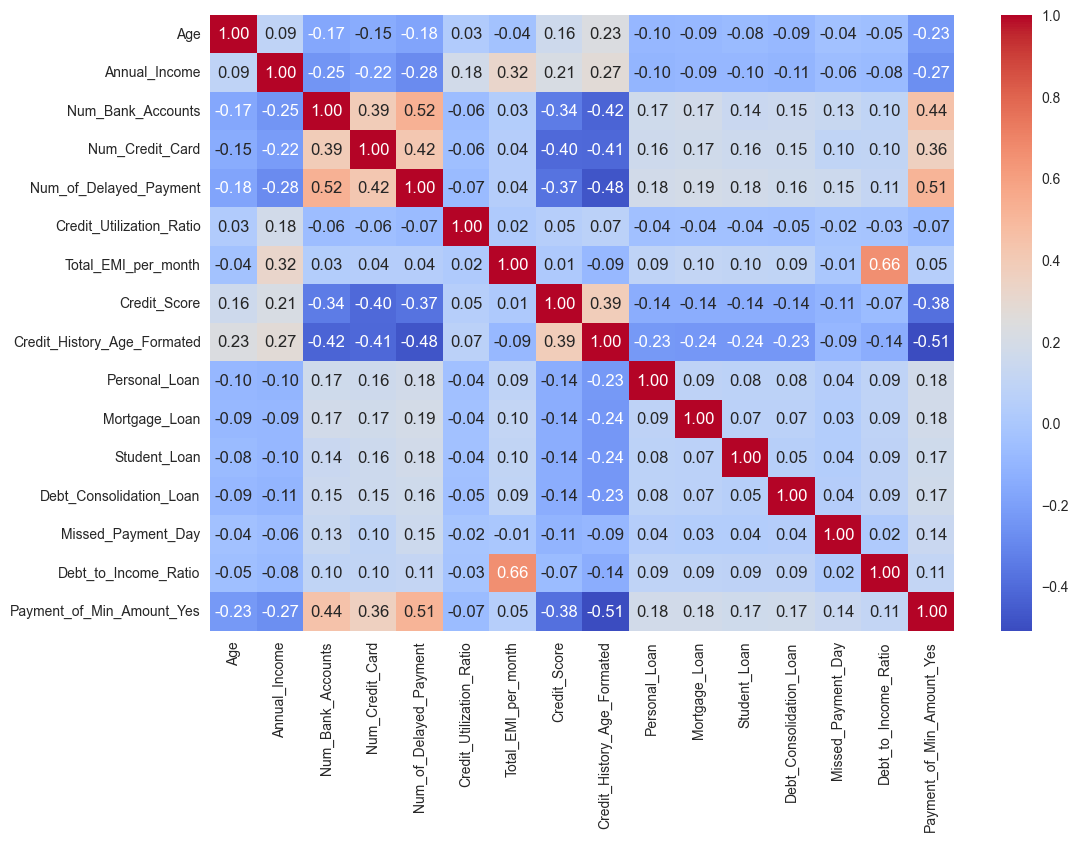

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Özellikler arasındaki korelasyonu hesaplayın
corr_matrix = df.corr()

# Korelasyon matrisi çizimi
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [80]:
y = df.Credit_Score
X = df.drop(columns='Credit_Score')

In [81]:
import pandas as pd
from pycaret.classification import *

In [82]:
clf1 = setup(df, target='Credit_Score', session_id=42)

,Description,Value
0,Session id,42
1,Target,Credit_Score
2,Target type,Multiclass
3,Target mapping,"-1: 0, 0: 1, 1: 2"
4,Original data shape,"(100000, 16)"
5,Transformed data shape,"(100000, 16)"
6,Transformed train set shape,"(70000, 16)"
7,Transformed test set shape,"(30000, 16)"
8,Numeric features,15
9,Preprocess,True


In [83]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7906,0.8965,0.7906,0.7903,0.7903,0.6498,0.6500,2.2930
et,Extra Trees Classifier,0.7815,0.8898,0.7815,0.7813,0.7813,0.6354,0.6355,1.2620
knn,K Neighbors Classifier,0.7645,0.8758,0.7645,0.7651,0.7643,0.6097,0.6101,0.0840
dt,Decision Tree Classifier,0.7253,0.7635,0.7253,0.7252,0.7253,0.5427,0.5428,0.1770
xgboost,Extreme Gradient Boosting,0.7146,0.8428,0.7146,0.7136,0.7121,0.5130,0.5149,0.6370
lightgbm,Light Gradient Boosting Machine,0.6788,0.8156,0.6788,0.6765,0.6761,0.4532,0.4546,1.7800
gbc,Gradient Boosting Classifier,0.6472,0.0000,0.6472,0.6439,0.6426,0.3935,0.3961,9.6110
ada,Ada Boost Classifier,0.6087,0.0000,0.6087,0.6062,0.5929,0.2992,0.3108,0.7260
nb,Naive Bayes,0.6064,0.7240,0.6064,0.6150,0.6091,0.3613,0.3624,0.0390
qda,Quadratic Discriminant Analysis,0.6049,0.0000,0.6049,0.6058,0.6047,0.3449,0.3454,0.0800


# Training the Model

In [84]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the objective function for Optuna
def objective(trial):
    # Hyperparameter selection
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    max_depth = trial.suggest_int('max_depth', 2, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    
    # Create a RandomForest model with the selected hyperparameters
    model = RandomForestClassifier(n_estimators=n_estimators, 
                                   max_depth=max_depth, 
                                   min_samples_split=min_samples_split, 
                                   class_weight='balanced',
                                   random_state=42)
    
    # Use a pipeline to apply StandardScaler and RandomForest
    pipeline = make_pipeline(StandardScaler(), model)
    
    # Train the model on the resampled dataset
    pipeline.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions on the validation set
    y_pred = pipeline.predict(X_val)
    
    # Evaluate the model using accuracy
    accuracy = accuracy_score(y_val, y_pred)
    
    return accuracy  # Optuna will try to maximize the accuracy

# Create the Optuna study
study = optuna.create_study(direction='maximize')

# Optimize the objective function
study.optimize(objective, n_trials=50)

# Print the best hyperparameters
print('Best hyperparameters:', study.best_params)



[I 2024-09-25 11:15:35,705] A new study created in memory with name: no-name-a3c2e27f-1c99-4373-a4f4-cc8f3e5529be
[I 2024-09-25 11:15:38,210] Trial 0 finished with value: 0.7868 and parameters: {'n_estimators': 13, 'max_depth': 25, 'min_samples_split': 3}. Best is trial 0 with value: 0.7868.
[I 2024-09-25 11:15:38,904] Trial 1 finished with value: 0.5615 and parameters: {'n_estimators': 14, 'max_depth': 4, 'min_samples_split': 3}. Best is trial 0 with value: 0.7868.
[I 2024-09-25 11:15:50,422] Trial 2 finished with value: 0.79765 and parameters: {'n_estimators': 61, 'max_depth': 43, 'min_samples_split': 9}. Best is trial 2 with value: 0.79765.
[I 2024-09-25 11:15:58,591] Trial 3 finished with value: 0.6854 and parameters: {'n_estimators': 56, 'max_depth': 16, 'min_samples_split': 6}. Best is trial 2 with value: 0.79765.
[I 2024-09-25 11:16:07,136] Trial 4 finished with value: 0.6124 and parameters: {'n_estimators': 86, 'max_depth': 10, 'min_samples_split': 5}. Best is trial 2 with valu

Best hyperparameters: {'n_estimators': 171, 'max_depth': 29, 'min_samples_split': 3}


In [85]:
study.best_params

{'n_estimators': 171, 'max_depth': 29, 'min_samples_split': 3}

In [86]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# En iyi hiperparametrelerle model oluşturma
best_params = study.best_params
best_model = RandomForestClassifier(**best_params, random_state=42)

best_model.fit(X_train, y_train)

# Validation set üzerinde tahmin yapma
y_pred = best_model.predict(X_val)

# Modeli değerlendirme
accuracy = accuracy_score(y_val, y_pred)
cm = confusion_matrix(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

# Sonuçları ekrana yazdırma
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{cm}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Accuracy: 0.80755
Confusion Matrix:
[[4807 1058    9]
 [1175 8699  725]
 [   6  876 2645]]
Precision: 0.8073759477542122
Recall: 0.80755
F1-Score: 0.8073778034378523


In [87]:
from sklearn.model_selection import cross_val_score

# Cross-validation ile model performansını kontrol edin
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)

# Her bir fold için skorları yazdırın
print("Cross-validation skorları:", cv_scores)

# Ortalama skor
print("Ortalama cross-validation skoru:", cv_scores.mean())


Cross-validation skorları: [0.79525   0.791625  0.7938125 0.7925625 0.7876875]
Ortalama cross-validation skoru: 0.7921875


In [88]:
import numpy as np
labels = np.unique(y_val)
conf = confusion_matrix(y_val, y_pred)
conf_p = conf/sum(conf)
conf = pd.DataFrame(conf, index=labels, columns=labels)
conf_p = pd.DataFrame(conf_p, index=labels, columns=labels)

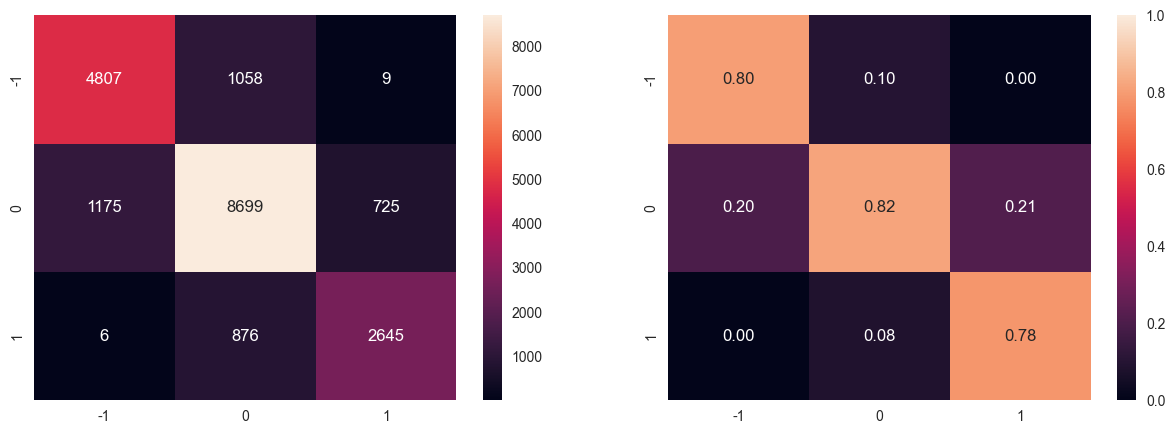

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
with sns.axes_style('white'):
    fig, ax =plt.subplots(1,2, figsize=(15, 5))
    sns.heatmap(conf, annot = True, fmt = '.0f',  ax=ax[0])
    sns.heatmap(conf_p, annot = True, fmt = '.2f', vmin=0, vmax=1,  ax=ax[1])

The dataset is imbalanced and even though I didn't address it, the imbalance didn't seem to have a big impact on the model's predictive capacity.

# Saving the Model

In [90]:
import joblib
import os
import zipfile

# Correct path to your models folder
model_dir = '../models/'

# Ensure the folder exists
os.makedirs(model_dir, exist_ok=True)

# Model file path
model_path = os.path.join(model_dir, 'best_model.pkl')

# Save the model
joblib.dump(best_model, model_path)

# ZIP file path
zip_file_path = os.path.join(model_dir, 'best_model.zip')

# Create a ZIP file
with zipfile.ZipFile(zip_file_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    zipf.write(model_path, os.path.basename(model_path))

print("Model dosyası başarıyla kaydedildi.")
print("Zip dosyası başarıyla oluşturuldu.")



Model dosyası başarıyla kaydedildi.
Zip dosyası başarıyla oluşturuldu.


In [93]:
df.columns

Index(['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Num_of_Delayed_Payment', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Credit_Score', 'Credit_History_Age_Formated',
       'Personal_Loan', 'Mortgage_Loan', 'Student_Loan',
       'Debt_Consolidation_Loan', 'Missed_Payment_Day', 'Debt_to_Income_Ratio',
       'Payment_of_Min_Amount_Yes'],
      dtype='object')